In [1]:
%load_ext autotime
import warnings
warnings.filterwarnings('ignore')

In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
from preprocessing import PreProcess

Using TensorFlow backend.


time: 1.36 s


In [3]:
pre = PreProcess("Assignment_4_data.txt")
X_train, X_test, y_train, y_test = pre.process(test_size=0.2) 
y_train = y_train.flatten()
y_test = y_test.flatten()

n_features = X_train.shape[1]
n_features

8404

time: 5.19 s


In [4]:
activation = 'relu'
model = Sequential()
model.add(Dense(100, input_dim=n_features))
model.add(Activation(activation))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(optimizer=keras.optimizers.SGD(lr=0.1, momentum=0.0),\
              loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               840500    
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 840,601
Trainable params: 840,601
Non-trainable params: 0
_________________________________________________________________
None
time: 52.8 ms


In [5]:
history = model.fit(X_train, y_train, epochs=50, batch_size=200,\
                    validation_data=(X_test, y_test), verbose=0)

time: 16.7 s


In [6]:
train_err = history.history['loss']
train_acc = history.history['acc']
test_err = history.history['val_loss']
test_acc = history.history['val_acc']

time: 1.24 ms


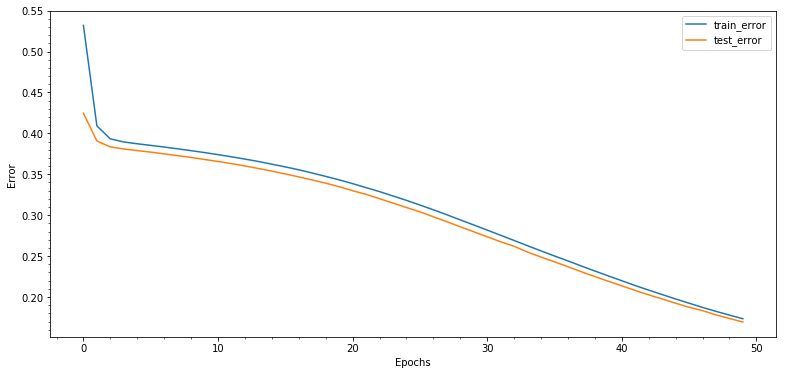

time: 396 ms


In [7]:
fig, ax = plt.subplots(1, 1, figsize=(13, 6))
ax.plot(train_err, label='train_error')
ax.plot(test_err, label='test_error')
ax.set_xlabel('Epochs')
ax.set_ylabel('Error')
ax.minorticks_on()
ax.legend()
plt.savefig('part1.error.relu.png')
plt.show()

In [8]:
accuracy = model.evaluate(X_test, y_test, batch_size=200, verbose=0)[1]
print("Final Test Accuracy:", accuracy)

('Final Test Accuracy:', 0.9327354171885504)
time: 54.1 ms


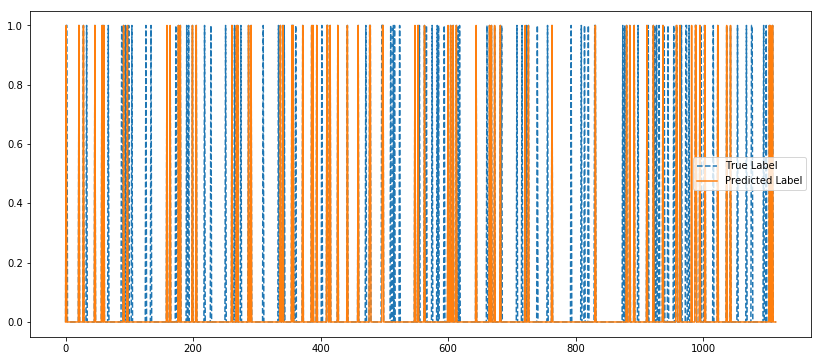

time: 491 ms


In [9]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
y_pred = model.predict(X_test)
y_pred[y_pred>0.5] = 1
y_pred[y_pred<=0.5] = 0
ax.plot(y_test, '--', label='True Label')
ax.plot(y_pred, label='Predicted Label')
plt.legend()
plt.savefig('part1.prediction.relu.png')
plt.show()